In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

from IPython.display import display

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [108]:
dataframe = pd.read_csv('./train_dataset.csv')
validation = pd.read_csv('./test_dataset.csv')

KNN
using ALL X variables

In [109]:
y = dataframe.iloc[:,-1]
x_all = dataframe.iloc[:,0:22]

In [110]:
dataframe

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


Class 0: 24666
Class 1: 14318
Proportion: 1.72 : 1


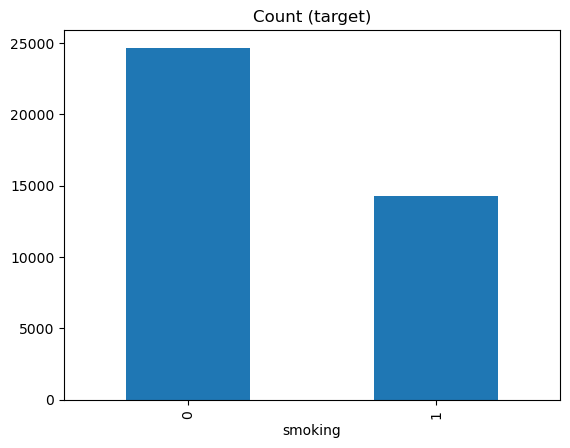

In [111]:
target_count = y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Random under-sampling:
smoking
0          14318
1          14318
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='smoking'>

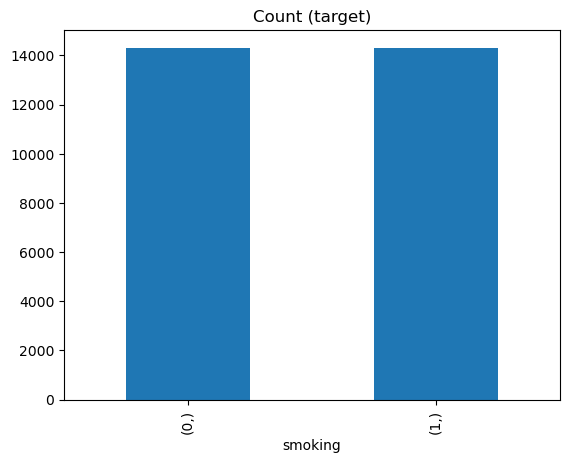

In [112]:
count_class_0, count_class_1 = y.value_counts()

# Divide by class using the DataFrame
df_class_0 = dataframe[dataframe['smoking'] == 0]
df_class_1 = dataframe[dataframe['smoking'] == 1]

# Downsample the majority class to match the minority class's size
df_class_0_under = df_class_0.sample(count_class_1)
dataset = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(dataset[['smoking']].value_counts())

dataset[['smoking']].value_counts().plot(kind='bar', title='Count (target)')

In [113]:
dataset
y_reduced = dataset.iloc[:,-1]
x_all_reduced = dataset.iloc[:,0:22]

scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(x_all_reduced)

# Transform the data using the scaler
x_all_reduced = scaler.transform(x_all_reduced)

In [119]:
x_train_all, x_test_all, y_train, y_test = train_test_split(x_all_reduced, y_reduced, test_size = 0.2, random_state=245)
y_train = y_train.values.ravel()

In [120]:
knn_all = KNeighborsClassifier(n_neighbors=1)
knn_all.fit(x_train_all, y_train)
pred_knn_all = knn_all.predict(x_test_all)

In [121]:
print(classification_report(y_test, pred_knn_all))
print(accuracy_score(y_test, pred_knn_all))
print(confusion_matrix(y_test, pred_knn_all, normalize='true'))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71      2953
           1       0.69      0.72      0.71      2775

    accuracy                           0.71      5728
   macro avg       0.71      0.71      0.71      5728
weighted avg       0.71      0.71      0.71      5728

0.7114175977653632
[[0.70199797 0.29800203]
 [0.27855856 0.72144144]]


KNN using manual x variables

In [150]:
x_manual = dataset[['hemoglobin', 'weight(kg)', 'waist(cm)', 'HDL', 'height(cm)', 'age', 'relaxation', 'systolic', 'triglyceride', 'serum creatinine']]
scaler = StandardScaler()
scaler.fit(x_manual)
x_manual = scaler.transform(x_manual)
x_train_manual, x_test_manual, y_train_man, y_test_man = train_test_split(x_manual, y_reduced, test_size = 0.2, random_state=245)
y_train_man = y_train_man.values.ravel()

In [151]:
knn_manual = KNeighborsClassifier(n_neighbors=1)
knn_manual.fit(x_train_manual, y_train_man)
pred_knn_manual = knn_manual.predict(x_test_manual)

In [152]:
print(classification_report(y_test, pred_knn_manual))
print(accuracy_score(y_test_man, pred_knn_manual))
print(confusion_matrix(y_test_man, pred_knn_manual, normalize='true'))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      2953
           1       0.69      0.72      0.70      2775

    accuracy                           0.71      5728
   macro avg       0.71      0.71      0.71      5728
weighted avg       0.71      0.71      0.71      5728

0.7075768156424581
[[0.69928886 0.30071114]
 [0.2836036  0.7163964 ]]


In [153]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                    max_depth=15, random_state=245)

# Train the model on the training set
gb_clf.fit(x_train_all, y_train)

# Make predictions on the test set
y_pred_gb = gb_clf.predict(x_test_all)

# Calculate the accuracy of the model
print(classification_report(y_test, y_pred_gb))
print(accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb, normalize='true'))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      2953
           1       0.73      0.86      0.79      2775

    accuracy                           0.78      5728
   macro avg       0.79      0.78      0.78      5728
weighted avg       0.79      0.78      0.78      5728

0.78125
[[0.70572299 0.29427701]
 [0.13837838 0.86162162]]


In [155]:
gb_mannual = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                    max_depth=15, random_state=245)

# Train the model on the training set
gb_mannual.fit(x_train_manual, y_train_man)

# Make predictions on the test set
y_pred_gb_manual = gb_mannual.predict(x_test_manual)

# Calculate the accuracy of the model
print(classification_report(y_test_man, y_pred_gb_manual))
print(accuracy_score(y_test_man, y_pred_gb_manual))
print(confusion_matrix(y_test_man, y_pred_gb_manual, normalize='true'))

              precision    recall  f1-score   support

           0       0.83      0.69      0.76      2953
           1       0.72      0.85      0.78      2775

    accuracy                           0.77      5728
   macro avg       0.78      0.77      0.77      5728
weighted avg       0.78      0.77      0.77      5728

0.7685055865921788
[[0.69420928 0.30579072]
 [0.15243243 0.84756757]]
